# 特徴抽出
- パターン認識に役立つ情報量の多い部分の事
  - <u>コーナー</u>
    - 情報量が多い・特徴量の代表的な例
    - エッジとエッジが交わっている場所
  - <u>エッジ</u>
    - 中間の情報量・大まかな場所の特定はできる。詳細は分からない
  - <u>フラット</u>
    - 情報量が少ない・何処にあるか分からない
    - 画像の中に方向性がない

### 特徴抽出のアルゴリズム
- フラットな領域は固有値の大きいものがない
  - <u>フラットの場合</u>
    - **画像の中に方向性がない**
    - 対角化 -> 固有ベクトルを求める -> グラフは満遍なくどの方向にも伸びる
    - 固有値も全ての要素が少しづつ入っていて方向性がない
  - <u>エッジの場合</u>
    - エッジに対して垂直に入っていく固有のベクトルの成分が存在する
    - 上記の固有ベクトルだけ数値が大きくなる(対応する固有値が大きくなる)
  - <u>コーナーの場合</u>
    - エッジが２つあるので２つの大きな固有のベクトルがある

### フラット・エッジ・コーナーの分け方
- 固有値の大きい固有ベクトルの個数で画像の特徴を抽出できる
  - 0個 -> フラット
  - 1個 -> エッジ
  - 2個 -> コーナー
- 特徴抽出のやり方の１つ
  - <u>Harris(ハリス)のコーナー検出</u>

### 実際には様々な特徴抽出・記述(アルゴリズム)がある
- <u>SIFT(シフト)</u>
  - 特徴量が128次元 = メモリ負荷大
  - 特許取得のため商用利用不可
- <u>SURF(サーフ)</u>
  - SIFTを高速化
  - 特許取得のため商用利用不可
- <u>ORB(オーブ)</u>
  - 特徴量を２値化 = 速い
  - 特許問題がない
- <u>KAZE(ケーズ)</u>
  - Gaussian カーネルではなく非線形filter 使用
  - 特許問題がない
- <u>AKAZE(アクセレイトケーズ)</u>
  - KAZE を高速化
  - 特許問題がない

In [27]:
import cv2
import numpy as np
import copy

In [28]:
img = cv2.imread("data/src/buildings.jpg")
img_g = cv2.imread("data/src/buildings.jpg", 0)  # グレースケール

In [29]:
# Harris のコーナー検出 / なぜコピーをするか？　画像を使用して特徴点を上書きしていく。元の画像が上書きされないようにする為
img_harris = copy.deepcopy(img)
img_dst = cv2.cornerHarris(img_g, 2, 3, 0.04)  # 画像 : 2,どれくらいの範囲でコーナーを検出するか : 3,内部でsobel filter を使用している。その大きさ : 0.04

In [30]:
# 固有ベクトルの固有値（コーナーの情報・特徴点が含まれている）
img_dst

array([[ 4.5355941e-12,  4.5355941e-12,  1.1451118e-12, ...,
         3.5410186e-10,  1.2930068e-10, -5.0404680e-11],
       [ 4.5355941e-12,  4.5355941e-12,  1.1451118e-12, ...,
         3.5410186e-10,  1.2930068e-10, -5.0404680e-11],
       [ 4.2316168e-09,  4.2316168e-09,  3.0776830e-09, ...,
        -5.2589866e-10,  3.0620884e-10,  2.3705824e-09],
       ...,
       [ 6.4994912e-09,  6.4994912e-09,  2.3405708e-09, ...,
         3.6491896e-10,  1.3303375e-10,  6.5685426e-12],
       [ 2.8279763e-09,  2.8279763e-09,  4.5132738e-09, ...,
         8.2739579e-11,  8.2222243e-11,  7.3907660e-12],
       [ 1.7488448e-09,  1.7488448e-09,  7.3175626e-09, ...,
         5.8581036e-11,  2.4574214e-12,  3.2888896e-12]], dtype=float32)

In [32]:
# 特徴点を書き込んでいく / 判定するコーナーのマックス量の５％より高ければ、そこは特徴点であるとみなして赤色を書き込む
img_harris[img_dst > 0.05 * img_dst.max()] = [0, 0, 255]
cv2.imshow("img", img_harris)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 19:32:59.735 python3[13147:223812] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (12.53 secs).
2021-08-18 19:32:59.735 python3[13147:223812] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (11.53 secs).
2021-08-18 19:32:59.735 python3[13147:223812] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 19:32:59.735 python3[13147:223812] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 19:32:59.735 python3[13147:223812] Text input context does not respond to _valueForTIProperty:
2021-08-18 19:32:59.735 python3[13147:223812] IMKClient Stall detected, *please Report* your user scenario attaching a spi

-1

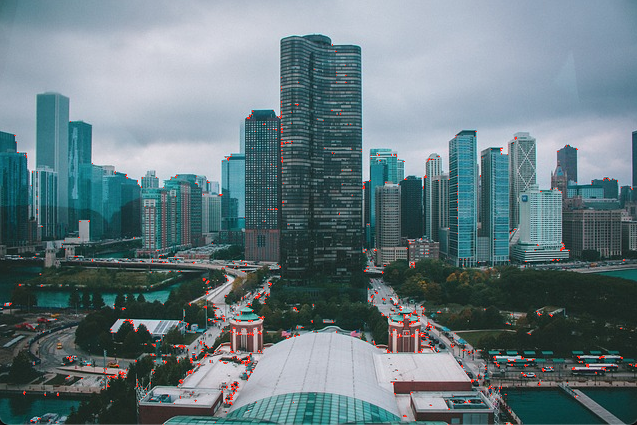

### KAZE（ケーズ）を使用

In [33]:
img_kaze = copy.deepcopy(img)  # copy
kaze = cv2.KAZE_create()       # kaze に特徴抽出器を入れる
kp1 = kaze.detect(img, None)   # 特徴を抽出して、特徴点を kp1 に入れる
img_kaze = cv2.drawKeypoints(img_kaze, kp1, None)  # kp1 の特徴点を描く
cv2.imshow("img", img_kaze)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 19:34:06.443 python3[13147:223812] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (63.89 secs).
2021-08-18 19:34:06.443 python3[13147:223812] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (55.02 secs).
2021-08-18 19:34:06.443 python3[13147:223812] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 19:34:06.443 python3[13147:223812] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 19:34:06.443 python3[13147:223812] Text input context does not respond to _valueForTIProperty:
2021-08-18 19:34:06.443 python3[13147:223812] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 19:34:06.44

-1

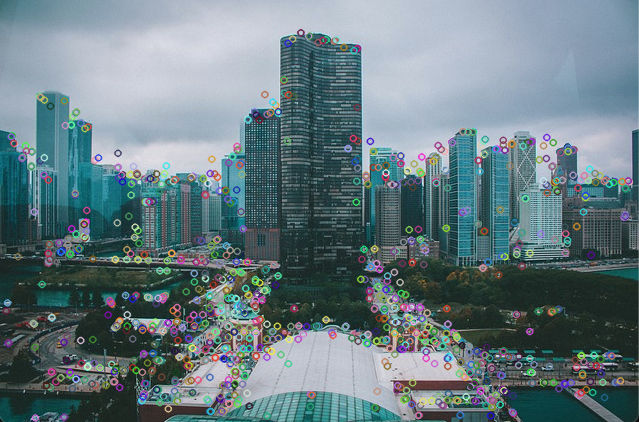

### AKAZE (アクセレイトケーズ) :create を AKAZE に変更するだけでOK/ 若干 window の立ち上がりが速い

In [15]:
img_kaze = copy.deepcopy(img)  # copy
kaze = cv2.KAZE_create()       # kaze に特徴抽出器を入れる
kp1 = kaze.detect(img, None)   # 特徴を抽出して、特徴点を kp1 に入れる
img_kaze = cv2.drawKeypoints(img_kaze, kp1, None)  # kp1 の特徴点を描く
cv2.imshow("img", img_kaze)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### ORB(オーブ): 

In [34]:
img_orb = copy.deepcopy(img)
orb = cv2.ORB_create()
kp2 = orb.detect(img_orb)
img_orb = cv2.drawKeypoints(img_orb, kp2, None)
cv2.imshow("img", img_orb)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### KAZE,AKAZE,ORBを比較する

In [17]:
cv2.imshow("Harris", img_harris)
cv2.imshow("ORB", img_orb)
cv2.imshow("AKAZE", img_kaze)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 18:52:18.276 python3[12796:200714] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 18:52:18.276 python3[12796:200714] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 18:52:18.276 python3[12796:200714] Text input context does not respond to _valueForTIProperty:
2021-08-18 18:52:18.277 python3[12796:200714] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 18:52:18.277 python3[12796:200714] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 18:52:18.277 python3[12796:200714] Text input context does not respond to _valueForTIProperty:
2021-08-18 18:52:18.349 python3[12796:200714] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 18:52:18.349 python3[12796:200714] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 18:52:18.349 python3[12796:200714] Text input context does not respond to _valueF

-1

## 顔検出
- Open CV にハールライクな特徴抽出器が入っている
- その　path を指定するだけで簡単に顔の検出ができる

### 今回は venv(仮想環境)なので
- path が特殊になるので間違わないようにする

venv/lib/python3.9/site-packages/cv2/data/haarcascade_frontalface_default.xml

venv/lib/python3.9/site-packages/cv2/data/の中に ハールライクな色々な特徴抽出器が入っている


In [2]:
import cv2

In [16]:
HAAR_FILE = "venv/lib/python3.9/site-packages/cv2/data/haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(HAAR_FILE)

In [17]:
img = cv2.imread("data/src/Solvay_conference_1927.jpg")
img_g = cv2.imread("data/src/Solvay_conference_1927.jpg", 0)

In [20]:
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 19:14:51.039 python3[13147:223812] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 19:14:51.039 python3[13147:223812] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 19:14:51.040 python3[13147:223812] Text input context does not respond to _valueForTIProperty:
2021-08-18 19:14:51.052 python3[13147:223812] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 19:14:51.052 python3[13147:223812] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 19:14:51.052 python3[13147:223812] Text input context does not respond to _valueForTIProperty:


-1

In [19]:
face = cascade.detectMultiScale(img_g)

In [23]:
# 画像が存在している場所：　x座標・y座標・大きさを返してくれる
face

array([[1203,  189,   65,   65],
       [ 339,  416,   49,   49],
       [1139,  421,   50,   50],
       [ 790,  425,   49,   49],
       [1288,  420,   56,   56],
       [1221,  375,   51,   51],
       [ 538,  439,   55,   55],
       [ 913,  425,   56,   56],
       [ 414,  445,   55,   55],
       [ 675,  449,   53,   53],
       [ 698,  510,   56,   56],
       [ 232,  382,   52,   52],
       [  65,  516,   54,   54],
       [ 828,  515,   56,   56],
       [1032,  422,   56,   56],
       [ 351,  520,   58,   58],
       [ 966,  522,   59,   59],
       [1126,  524,   66,   66],
       [ 200,  538,   57,   57],
       [1277,  533,   61,   61],
       [ 514,  516,   65,   65],
       [ 918,  565,   62,   62],
       [1043,  559,   69,   69],
       [ 115,  570,   53,   53],
       [ 421,  568,   60,   60],
       [ 583,  570,   70,   70],
       [1217,  574,   60,   60],
       [ 191,  511,   64,   64],
       [ 783,  563,   65,   65],
       [1230,  645,   30,   30],
       [ 2

### for文を回すことで、検出した場所にレクタングルで枠をつける

In [25]:
for x, y, w, h in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 1)  # 画像 : 始点,終点 : color : 線の太さ
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 19:24:42.490 python3[13147:223812] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 19:24:42.490 python3[13147:223812] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 19:24:42.491 python3[13147:223812] Text input context does not respond to _valueForTIProperty:
2021-08-18 19:24:42.491 python3[13147:223812] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 19:24:42.491 python3[13147:223812] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 19:24:42.491 python3[13147:223812] Text input context does not respond to _valueForTIProperty:


-1

- 多少の的外れはあるが、かなりの性能で OpenCV の ハールライクな顔検出は性能が良い！

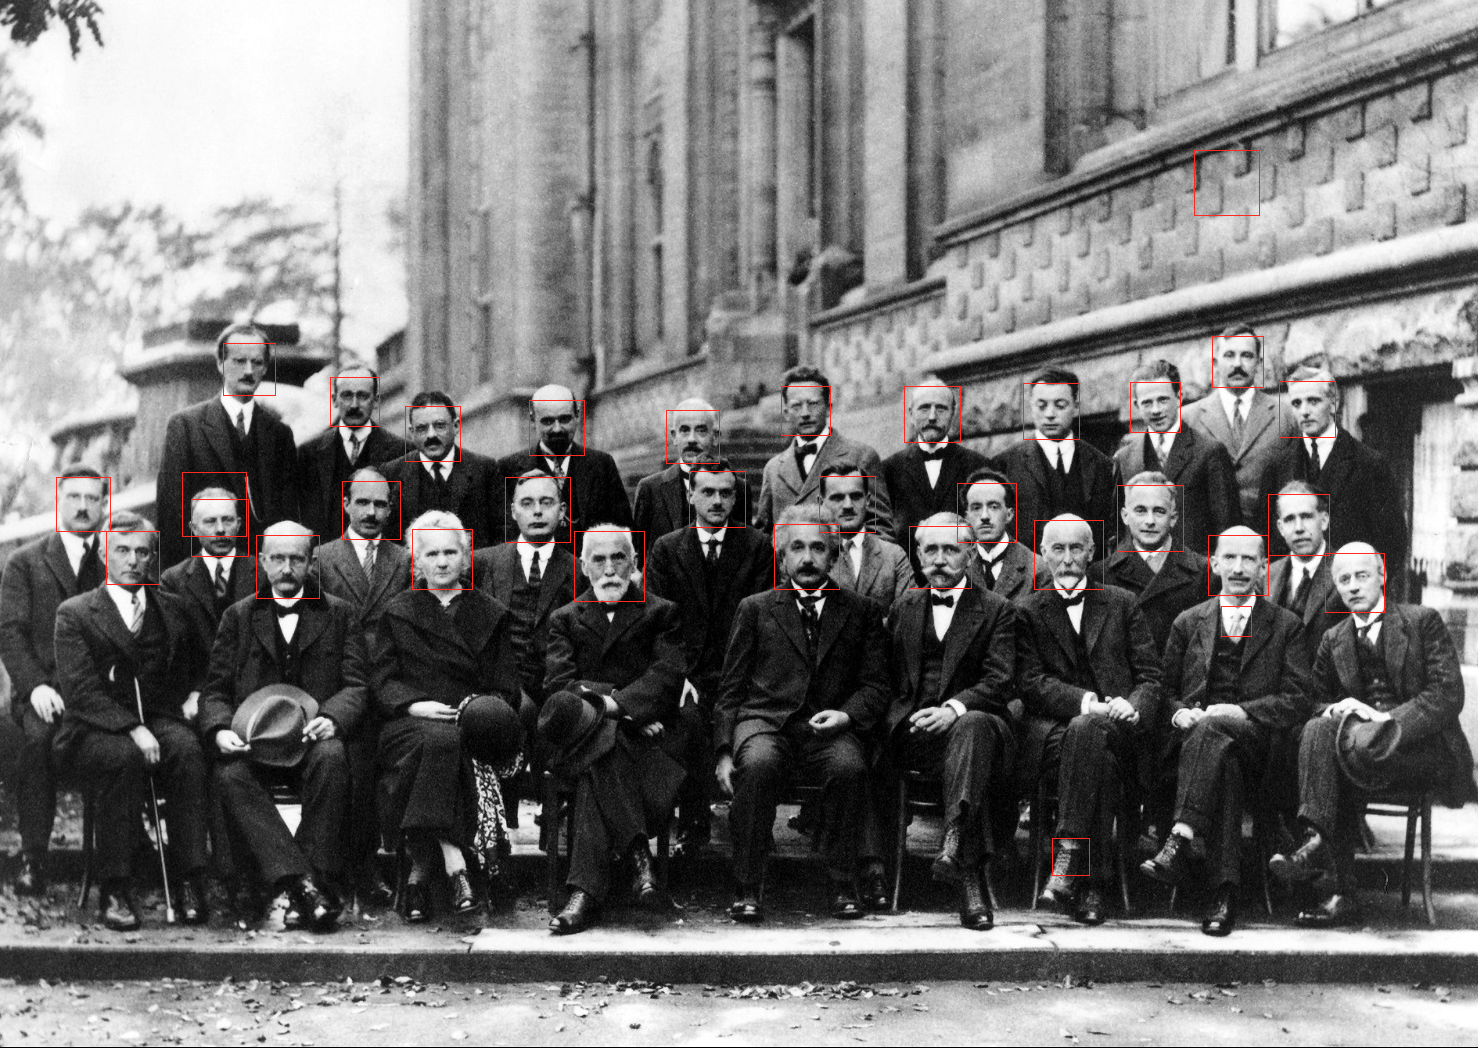